In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
LIAR = pd.read_csv(DATA_BASE_DIR + "/LIAR.csv", index_col=0)
columns = ["id",
           "label",
           "statement",
           "subject",
           "speaker",
           "job_title",
           "state_info",
           "party_affiliation",
           "barely_true_counts",
           "false_counts",
           "half_true_counts",
           "mostly_true_counts",
           "pants_on_fire_counts",
           "context",
           "justification"]
LIAR.columns = columns

In [4]:
LIAR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12793 entries, 0 to 1283
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12791 non-null  object 
 1   label                 12791 non-null  object 
 2   statement             12791 non-null  object 
 3   subject               12789 non-null  object 
 4   speaker               12789 non-null  object 
 5   job_title             9224 non-null   object 
 6   state_info            10042 non-null  object 
 7   party_affiliation     12789 non-null  object 
 8   barely_true_counts    12789 non-null  float64
 9   false_counts          12789 non-null  float64
 10  half_true_counts      12789 non-null  float64
 11  mostly_true_counts    12789 non-null  float64
 12  pants_on_fire_counts  12789 non-null  float64
 13  context               12660 non-null  object 
 14  justification         12692 non-null  object 
dtypes: float64(5), objec

In [33]:
LIAR['context'] = LIAR['context'].str.rstrip('.')

### Understand each columns

Text(0.5, 1.0, 'Top 30 State_info')

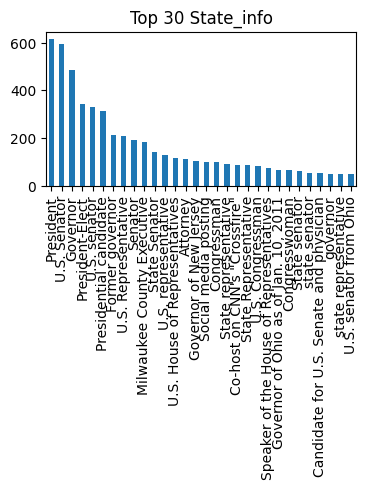

In [27]:
# categorical: subject, speaker, job_title, state_info,
plt.figure(figsize = (4,2))
state_cnt = LIAR['job_title'].value_counts().head(30)
state_cnt.plot(kind = 'bar')
plt.title("Top 30 State_info")

Text(0.5, 1.0, 'Top 30 speaker_info')

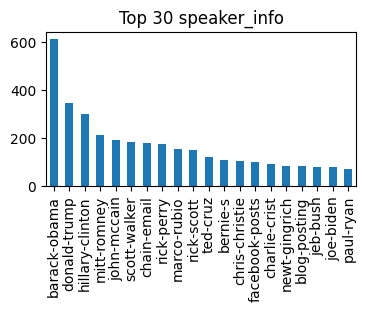

In [24]:
plt.figure(figsize = (4,2))
state_cnt = LIAR['speaker'].value_counts().head(20)
state_cnt.plot(kind = 'bar')
plt.title("Top 20 speaker_info")

Text(0.5, 1.0, 'Top 30 State_info')

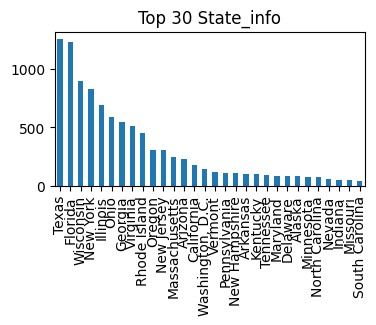

In [22]:
plt.figure(figsize = (4,2))
state_cnt = LIAR['state_info'].value_counts().head(30)
state_cnt.plot(kind = 'bar')
plt.title("Top 30 State_info")

Text(0.5, 1.0, 'Top 30 Party_info')

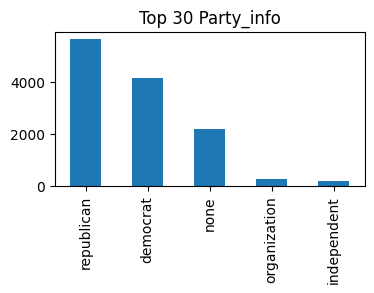

In [29]:
plt.figure(figsize = (4,2))
state_cnt = LIAR['party_affiliation'].value_counts().head(5)
state_cnt.plot(kind = 'bar')
plt.title("Top 5 Party_info")

Text(0.5, 1.0, 'Top 20 context_info')

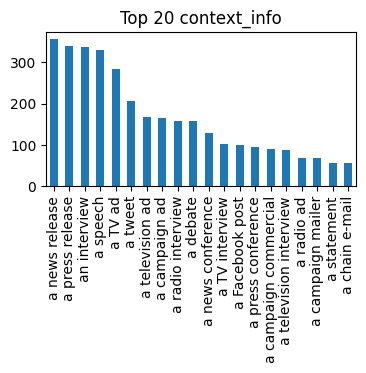

In [34]:
plt.figure(figsize = (4,2))
state_cnt = LIAR['context'].value_counts().head(20)
state_cnt.plot(kind = 'bar')
plt.title("Top 20 context_info")

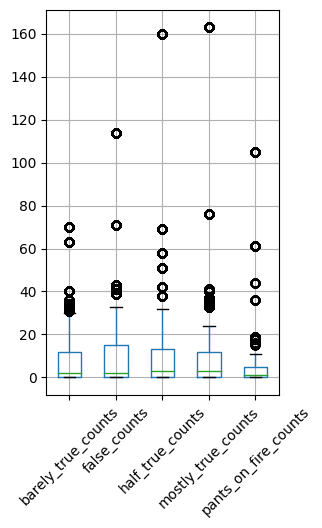

In [39]:
# numerical:barely_true_counts, false_counts, half_true_counts , mostly_true_counts, pants_on_fire_counts
plt.figure(figsize=(3, 5))
LIAR[['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']].boxplot()
plt.xticks(rotation=45)
plt.show()


<ipython-input-63-0fc31ad85d16>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = LIAR.groupby('label').sum()


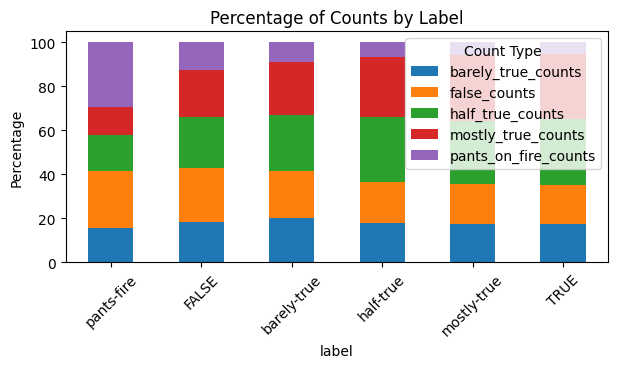

In [63]:
label_order = ['pants-fire','FALSE','barely-true','half-true','mostly-true','TRUE']
grouped = LIAR.groupby('label').sum()
grouped = grouped.loc[label_order,:]

grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percentage.plot(kind='bar', stacked=True, figsize=(7, 3))
plt.title('Percentage of Counts by Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Count Type')
plt.show()

Text(0.5, 1.0, 'Label Count')

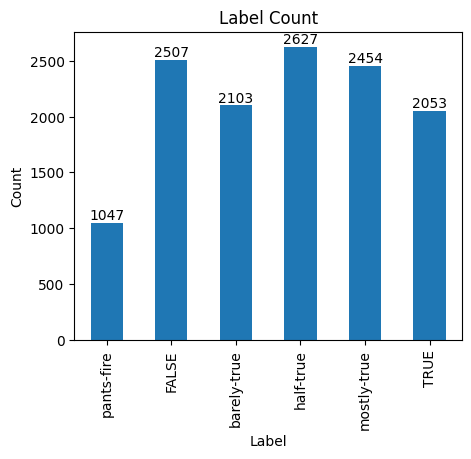

In [71]:
# Y variable
y_cnt = LIAR['label'].value_counts().reindex(label_order)
y_cnt.plot(kind = 'bar',figsize = (5,4))
for index, value in enumerate(y_cnt):
    plt.text(index, y_cnt[index], f'{value}', ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Count')

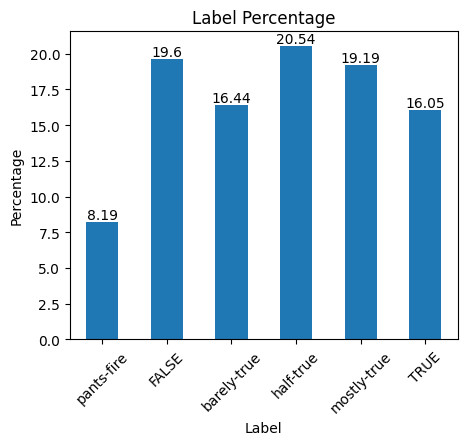

In [72]:
percentages = (LIAR['label'].value_counts(normalize=True) * 100).round(2).reindex(label_order)
percentages.plot(kind='bar',figsize = (5,4))
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.title('Label Percentage')
for index, value in enumerate(percentages):
    plt.text(index, percentages[index], f'{value}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()